## Load libraries

In [1]:
import numpy as np
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

## Load image

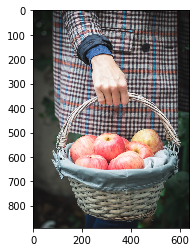

In [2]:
# Load an image
img = np.float32(imread('apples.jpg'))/255.
plt.imshow(img)

## Simplest method to rotate an image by 90 deg clockwise

Text(0.5, 1.0, '270 degs')

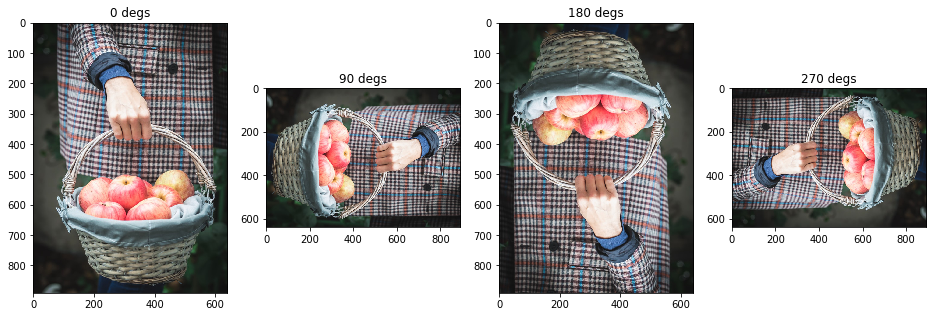

In [3]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('0 degs')

plt.subplot(1, 4, 2)
plt.imshow(img[::-1, :].swapaxes(0, 1))
plt.title('90 degs')


plt.subplot(1, 4, 3)
plt.imshow(img[::-1, ::-1])
plt.title('180 degs')


plt.subplot(1, 4, 4)
plt.imshow(img[:, ::-1].swapaxes(0, 1))
plt.title('270 degs')

## Rotate function

In [9]:
def rotate(img, theta):
    H, W = img.shape
    center_x, center_y = (W-1)//2, (H-1)//2
    
    out = np.zeros([H, W])
    
    # Map indices of output image back to the indices of original image
    y, x = np.meshgrid(range(H), range(W), indexing='ij')
    print(x.shape)

    src_x =  (x - center_x) * np.cos(theta) + (y - center_y) * np.sin(theta) + center_x
    src_y = -(x - center_x) * np.sin(theta) + (y - center_y) * np.cos(theta) + center_y
    
#     cond1 = np.logical_and(src_x>0, src_y>0)
#     cond2 = np.logical_and(src_x<W-1, src_y<H-1)
#     cond = np.logical_and(cond1, cond2)
    cond = (src_x > 0) * (src_x < W - 1) * (src_y > 0) * (src_y < H - 1)
    src_x, src_y = src_x[cond], src_y[cond]
    x, y = x[cond], y[cond]

    # Bilinear iterplotation
    src_xf, src_yf = np.int32(np.floor(src_x)), np.int32(np.floor(src_y))
    src_xc, src_yc = src_xf+1, src_yf+1
#     src_xc, src_yc = np.int32(np.ceil(src_x)), np.int32(np.ceil(src_y))
    out[y, x] = (src_y-src_yf) * (src_x-src_xf)* img[src_yc,src_xc] + (src_yc-src_y) * (src_xc-src_x)* img[src_yf,src_xf]
    out[y, x] += (src_y-src_yf) * (src_xc-src_x)* img[src_yc,src_xf] + (src_yc-src_y) * (src_x-src_xf)* img[src_yf,src_xc]
    
    return out

## Rotation by 60 degrees

(891, 640)
(891, 640)
(891, 640)


Text(0.5, 1.0, 'Rotate by 60 degs CW')

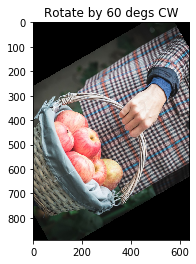

In [10]:
H, W, c = img.shape
img_rot_60 = np.zeros_like(img)
for c in range(3):
    img_rot_60[:, :, c] = rotate(img[:, :, c], np.pi/3)
plt.imshow(img_rot_60)
plt.title('Rotate by 60 degs CW')

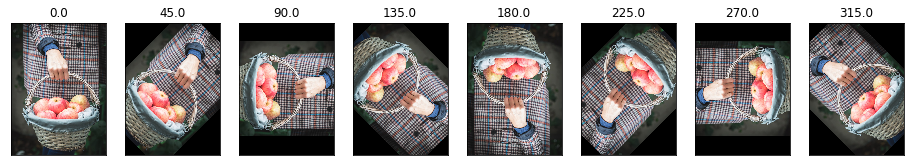

In [6]:
plt.figure(figsize=(16, 8))
angles = np.arange(0., 2*np.pi, np.pi/4)
for idx, angle in enumerate(angles):
    img_rot = np.zeros_like(img)
    for c in range(3):
        img_rot[:, :, c] = rotate(img[:, :, c], angle)
    plt.subplot(1, len(angles), idx + 1)
    plt.imshow(img_rot)
    plt.title(str(round(angle * 180. / np.pi)))
    plt.xticks([]); plt.yticks([])
plt.show()